In [60]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
testFileName = "Datasets/Dataset_1_test.csv"
    
testFile = pd.read_csv(testFileName, header=None)
testFile = testFile.drop([2], axis=1) # empty column
input_test = testFile[0]
output_test = testFile[1]

trainFileName = "Datasets/Dataset_1_train.csv"

trainFile = pd.read_csv(trainFileName, header=None)
trainFile = trainFile.drop([2], axis=1) # empty column
input_train = trainFile[0]
output_train = trainFile[1]

validFileName = "Datasets/Dataset_1_valid.csv"

validFile = pd.read_csv(validFileName, header=None)
validFile = validFile.drop([2], axis=1) # empty column
input_valid = validFile[0]
output_valid = validFile[1]

In [22]:
def buildMatrix(l, degree):
    m = np.zeros((len(l), degree+1)) # initializing matrix
    
    powerList = []
    for i in range(degree+1):
        powerList.append(i)
    
    for row in range(len(l)):
        m[row] = l[row]
        m[row] = np.power(m[row], powerList)

    return m

In [169]:
def calcMse(m, y, w, regularizationCoef):
    error = 0
    for i in range(len(y)):
        error += ((np.dot(m[i], w) - y[i])**2)/2
    
    if (regularizationCoef > 0):
        error += float(regularizationCoef)*(norm(w)**2)/2
    
    return error

In [121]:
def calcWeights(m, y, regularizationCoef):
    if (regularizationCoef > 0):
        return np.dot(np.dot(np.linalg.inv(np.add(np.dot(m.T,m), np.dot(regularizationCoef,np.eye(len(m.T))))), m.T), y)
    else:
        return np.dot(np.dot(np.linalg.inv(np.dot(m.T, m)), m.T), y)

In [183]:
m_train = buildMatrix(input_train, 20)
m_valid = buildMatrix(input_valid, 20)

w = calcWeights(m_train, output_train, 0)

yPredicted_train = np.dot(m_train, w)
yPredicted_valid = np.dot(m_valid, w)

print("MSE Train:")
print(calcMse(m_train, output_train, w, 0))

print("")
print("MSE Valid:")
print(calcMse(m_valid, output_valid, w, 0))

MSE Train:
161.867583452

MSE Valid:
35548.6560015


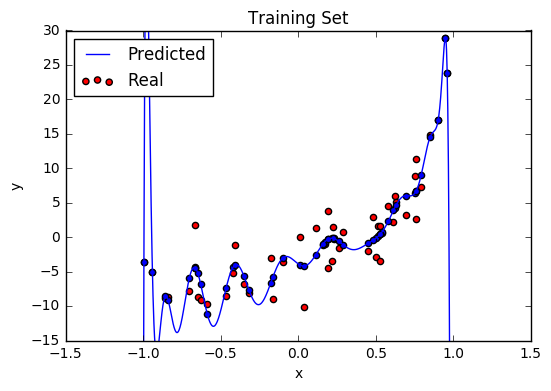

In [177]:
plt.scatter(input_train, output_train, c='r', label="Real")
plt.scatter(input_train, yPredicted_train, c='b')
cont_x = np.linspace(-1.0, 1.0, num=1000)
cont_y = vp(cont_x)
plt.plot(cont_x, cont_y, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.ylim(-15,30)
plt.title("Training Set")

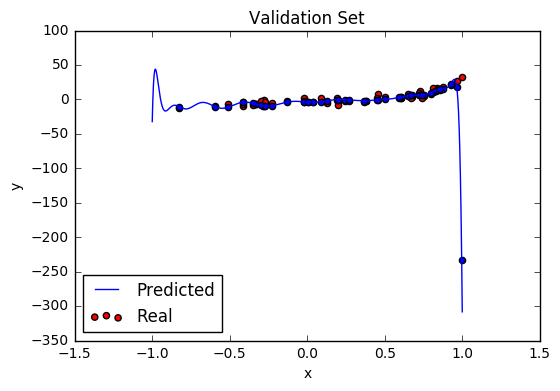

In [178]:
plt.scatter(input_valid, output_valid, c='r', label="Real")
plt.scatter(input_valid, yPredicted_valid, c='b')
cont_x = np.linspace(-1.0, 1.0, num=1000)
cont_y = vp(cont_x)
plt.plot(cont_x, cont_y, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=3)
plt.title("Validation Set")

In [102]:
p = np.poly1d(np.flipud(w))
vp = np.vectorize(p)

In [180]:
lambdas = np.linspace(0.001, 1, 1000)

In [170]:
trainMse = []
validMse = []

for i in range(len(lambdas)):
    w = calcWeights(m_train, output_train, lambdas[i])
    trainMse.append(calcMse(m_train, output_train, w, lambdas[i]))
    validMse.append(calcMse(m_valid, output_valid, w, lambdas[i]))
    

In [132]:
def norm(w):
    return np.linalg.norm(w)

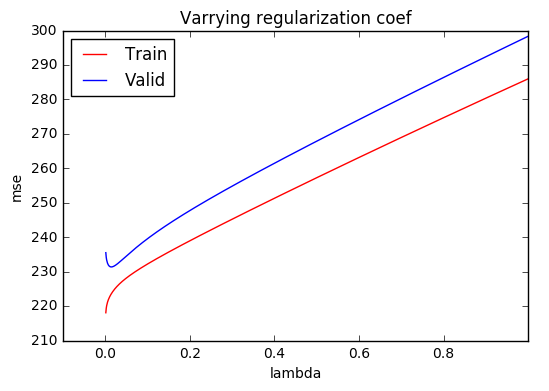

In [179]:
plt.plot(lambdas, trainMse, c='r', label="Train")
plt.plot(lambdas, validMse, c='b', label="Valid")
plt.xlabel("lambda")
plt.ylabel("mse")
plt.legend(loc=2)
plt.xlim(-0.1, 1)
plt.title("Varrying regularization coef")

In [172]:
minValidMse = min(validMse)
minValidLambda = lambdas[validMse.index(minValidMse)]

print(minValidMse)
print(minValidLambda)

231.353247304
0.014


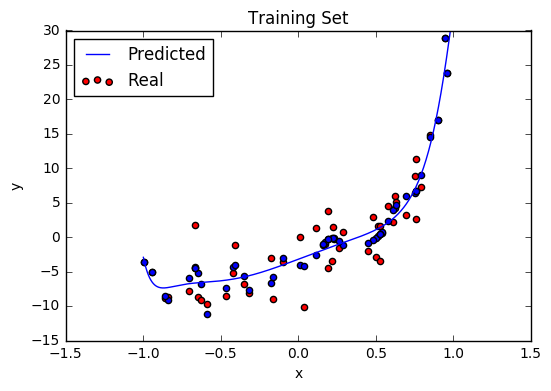

In [181]:
w = calcWeights(m_train, output_train, 0.014) # optimal lambda
p = np.poly1d(np.flipud(w))
vp = np.vectorize(p)

plt.scatter(input_train, output_train, c='r', label="Real")
plt.scatter(input_train, yPredicted_train, c='b')
cont_x = np.linspace(-1.0, 1.0, num=1000)
cont_y = vp(cont_x)
plt.plot(cont_x, cont_y, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.ylim(-15,30)
plt.title("Training Set")

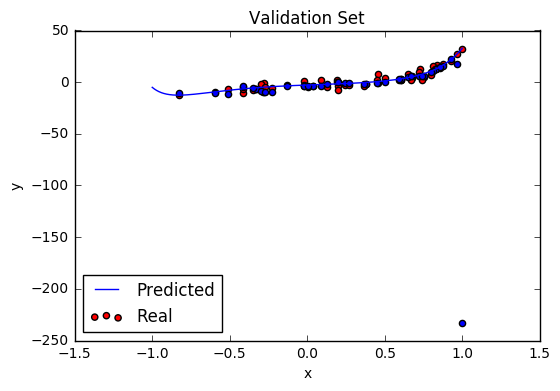

In [182]:
w = calcWeights(m_valid, output_valid, 0.014) # optimal lambda
p = np.poly1d(np.flipud(w))
vp = np.vectorize(p)

plt.scatter(input_valid, output_valid, c='r', label="Real")
plt.scatter(input_valid, yPredicted_valid, c='b')
cont_x = np.linspace(-1.0, 1.0, num=1000)
cont_y = vp(cont_x)
plt.plot(cont_x, cont_y, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=3)
plt.title("Validation Set")

In [187]:
# Which degree polynomial is it?

degree = 20
mses = []
for deg in range(degree):
    m = buildMatrix(input_train, deg)
    w = calcWeights(m, output_train, 0)
    pred_y = np.dot(m, w)
    mses.append(calcMse(m, output_train, w, 0))
    
degrees = [i for i in range(degree)]

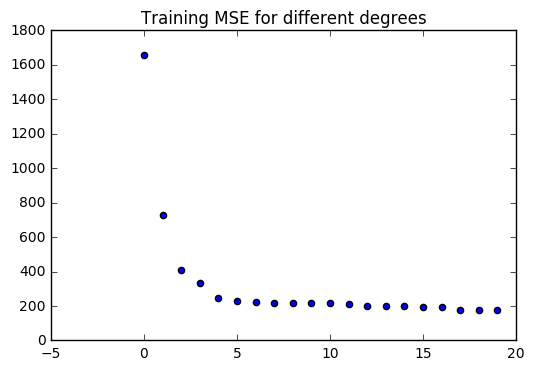

In [189]:
plt.scatter(degrees, mses)
plt.title("Training MSE for different degrees")

In [ ]:
#Plateau at degree 4 so it is probably the source polynomial